No projector specified for this dataset. Please consider the method self.add_proj.


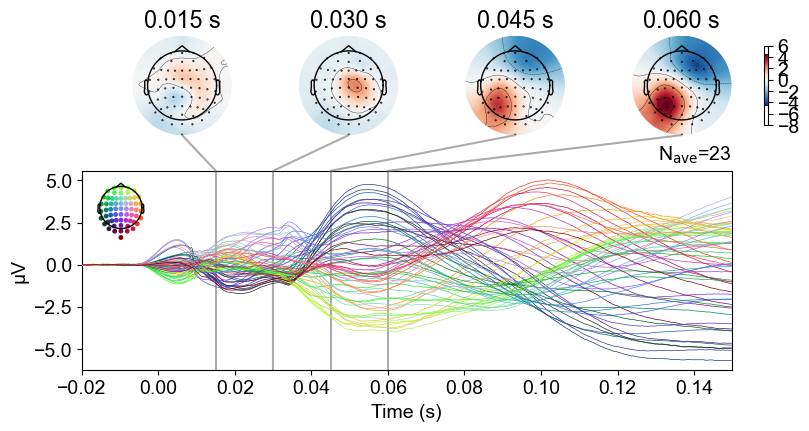

No projector specified for this dataset. Please consider the method self.add_proj.


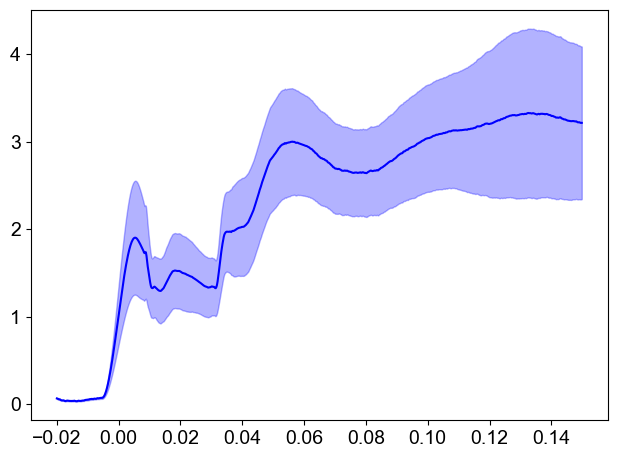

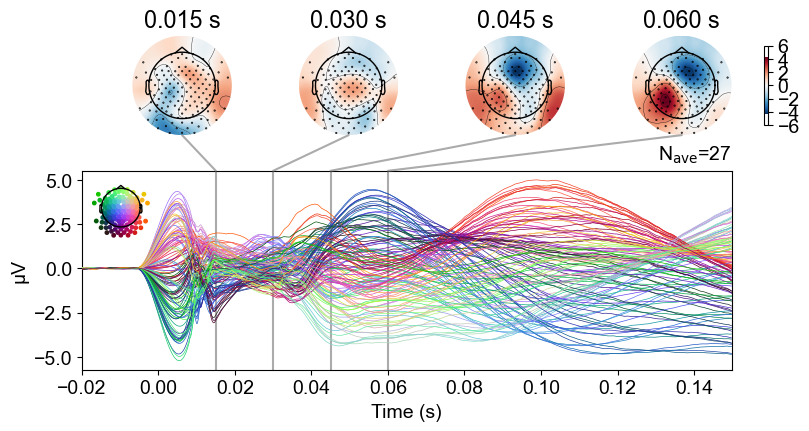

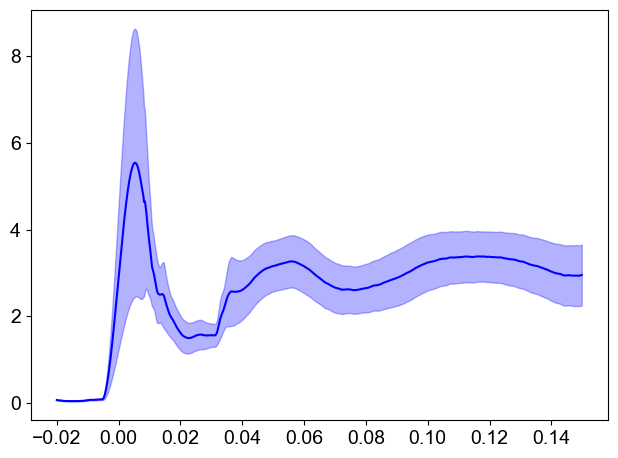

In [1]:
import mne
import os
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'arial'
plt.rcParams['font.size'] = 14
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'
sites = ['Aalto', 'Tuebingen']
source_dir = r"D:\REFTEP_ALL\Source_analysis\Source_analysis_"
for site in sites:
    source_site_dir = source_dir + site
    datadir = fr"D:\REFTEP_ALL\EEG_preprocessing_data\Data_{site}"
    subjects = os.listdir(datadir)
    n_subjects = len(subjects)
    evoked_datas = []
    gmfps = []
    for subject in subjects:
        epochs_path = os.path.join(datadir,subject,f'{subject}_EEG_post_processed.set')
        evoked = mne.read_epochs_eeglab(epochs_path, verbose=False).average()
        evoked_datas.append(evoked.data)
        gmfps.append(np.std(evoked.data*1e6,axis=0))
    combined_evoked = mne.EvokedArray(np.mean(evoked_datas,axis=0),info=evoked.info, nave=n_subjects, tmin=evoked.times[0])
    fig_joint = combined_evoked.plot_joint(times=[0.015, 0.03, 0.045, 0.06], title=None)
    fig_joint.savefig(f'grand_average_jointplot_{site}.pdf', dpi=300, format='pdf')
    fig, axs = plt.subplots()
    mean_gmfp = np.mean(gmfps, axis=0)
    std_gmfp_scaled = np.std(gmfps, axis=0)*0.3
    axs.plot(evoked.times, mean_gmfp, color='blue')
    axs.set_xticks([-0.02, 0.00, 0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14])
    axs.fill_between(evoked.times, mean_gmfp - std_gmfp_scaled, mean_gmfp + std_gmfp_scaled, color='blue', alpha=0.3)
    fig.tight_layout()
    fig.savefig(f'gmfp_plot_{site}.pdf', dpi=300, format='pdf')
    